# Analiza podatkov o knjigah

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
# MaxNLocator potrebujemo, da vrednosti na oseh grafa nastavimo tako, da so cela števila
from collections import Counter 
# Counter potrebujemo za štetje elementov v seznamu žanrov
knjige = pd.read_csv("goodreads_knjige.csv", index_col="id_knjige")

# Da se leto izdaje in število strani prikažeta kot int:
knjige["leto_izdaje"] = knjige["leto_izdaje"].astype("Int64")
knjige["st_strani"] = knjige["st_strani"].astype("Int64")

## Uvod
V tem dokumentu bom analizirala knjige na seznamu [Best Books of the 21st Century](https://www.goodreads.com/list/show/7.Best_Books_of_the_21st_Century), torej knjige, izdane v 21. stoletju (med 1. 1. 2001 in 31. 12. 2100), ki so jih uporabniki spletne strani Goodreads uvrstili kot najboljše. Zbrala sem podatke iz prvih 30 strani seznama, torej 3000 knjig. Vrstni red knjige na seznamu je določen z skupno oceno (total score). Ta temelji na več dejavnikih, vključno s številom ljudi, ki so glasovali zanjo, in podanimi ocenami.  

S seznama sem pobrala naslednje podatke o vsaki knjigi: ID, ki ga ustvari Goodreads, naslov, avtor, povprečna ocena, število ocen, število recenzij, leto izdaje, število strani, jezik, število trenutnih bralcev, žanri.  
Podatki so bili pobrani 26. 8. 2025.   
  
Opomba: V nadaljevanju poročila beseda "seznam" označuje prvih 3000 knjig, ne celotnega seznama, trenutni bralci pa pomenijo bralce, ki so knjigo brali takrat, ko so podatki bili zajeti.

V spodnji tabeli je prikazanih prvih 10 knjig na tem seznamu – torej po tem kriteriju 10 najboljših knjig 21. stoletja.

In [184]:
knjige.head(10)

,naslov,avtor,povp_ocena,st_ocen,st_recenzij,leto_izdaje,st_strani,jezik,st_trenutnih_bralcev,zanri
id_knjige,,,,,,,,,,
58613224,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4.62,4027023,96378,2007,784,English,52841,"Fantasy, Young Adult, Fiction, Magic, Children..."
2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9649908,253738,2008,374,English,104020,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."
77203,The Kite Runner,Khaled Hosseini,4.35,3418413,110251,2003,371,English,50245,"Fiction, Historical Fiction, Classics, Contemp..."
19063,The Book Thief,Markus Zusak,4.39,2815021,157168,2006,592,English,99785,"Historical Fiction, Fiction, Young Adult, Clas..."
58613345,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.58,3579983,67597,2005,672,English,52192,"Fantasy, Fiction, Young Adult, Magic, Audioboo..."
58613451,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3709438,74754,2003,896,English,85923,"Fantasy, Young Adult, Fiction, Magic, Audioboo..."
4667024,The Help,Kathryn Stockett,4.47,2972171,93428,2009,464,English,24949,"Fiction, Historical Fiction, Book Club, Histor..."
128029,A Thousand Splendid Suns,Khaled Hosseini,4.45,1692128,89730,2007,372,English,40655,"Fiction, Historical Fiction, Book Club, Contem..."
6148028,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.35,4039876,148004,2009,391,English,59250,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."


## Osnovni pregled podatkov


V spodnjih tabelah so predstavljeni podatki o številu knjig, izdanih v posameznih desetletjih, letih in jezikih.  
Za najbolj produktivno leto se je izkazalo leto 2006, naslednja pa so še leta 2007, 2011, 2010 in 2012. Pričakovano je, da se v tej tabeli pojavijo letnice iz prejšnjih dveh desetletij, saj je od izdaje teh knjig minilo že več let in jih je lahko prebralo več bralcev.  
Največ knjig je napisanih v angleščini - kar 98 % vseh knjig na seznamu. Sledijo španščina, francoščina in nemščina, v ostalih jezikih pa je napisano manj kot 5 knjig.

In [185]:
knjige_desetletja = knjige.copy() # da originalna razpredelnica ostane brez stolpca desetletje
knjige_desetletja["desetletje"] = (knjige_desetletja["leto_izdaje"] // 10) * 10

In [186]:
desetletja = knjige_desetletja.groupby("desetletje")["naslov"].count()
podatki1 = {
    "desetletje": desetletja.index,
    "število knjig": desetletja.values,
}
razpredelnica1 = pd.DataFrame(data=podatki1)
razpredelnica1

,desetletje,število knjig
0,2000,1479
1,2010,1418
2,2020,98


In [187]:
top_5_let = knjige.groupby("leto_izdaje")["naslov"].count().nlargest(5)
podatki2 = {
    "leto izdaje": top_5_let.index,
    "število knjig": top_5_let.values,
}
razpredelnica2 = pd.DataFrame(data=podatki2)
razpredelnica2

,leto izdaje,število knjig
0,2006,271
1,2007,263
2,2011,253
3,2010,225
4,2012,221


In [188]:
jeziki = (
    knjige.groupby("jezik")["naslov"]
    .count()
    .reset_index() # "jezik" iz indeksa prestavi v stolpec
    .rename(columns={"naslov": "število knjig"})
    .sort_values(by="število knjig", ascending=False)
    .reset_index(drop=True) # da so števila v prvem stolpcu urejena po vrsti
)
jeziki["procent"] = ((jeziki["število knjig"] / jeziki["število knjig"].sum()) * 100).round(2) # dodamo stolpec

jeziki

,jezik,število knjig,procent
0,English,2922,98.42
1,Spanish; Castilian,8,0.27
2,French,7,0.24
3,German,7,0.24
4,Arabic,4,0.13
5,Dutch; Flemish,3,0.10
6,Finnish,3,0.10
7,Italian,3,0.10
8,"Greek, Modern (1453-)",3,0.10
9,Polish,2,0.07


Če zaokrožimo ocene na celo število in rezultate prikažemo v tortnem diagramu, lahko opazimo, da ima večina knjig povprečno oceno 4 (kar 93,2 %). Morda je presenetljivo, da je delež knjig z zaokroženo oceno 5 precej majhen (3,6 %), na seznamu pa je tudi delež (3,2 %) knjig z zaokroženo oceno 3. To lahko pripisujemo dejstvu, da povprečna ocena ni edini kriterij za uvrstitev na listo.

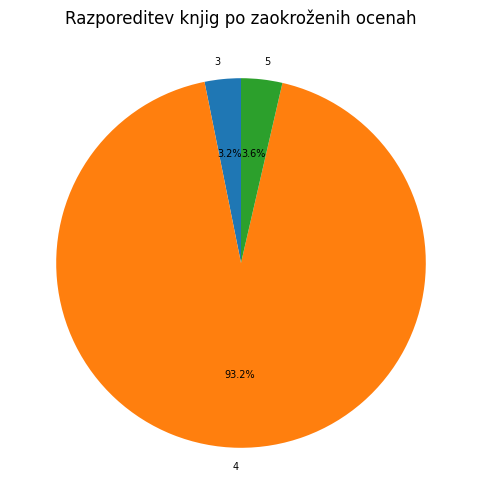

In [189]:
ocene = knjige["povp_ocena"]
zaokrozene_ocene = ocene.apply(round)
st_ocen = zaokrozene_ocene.value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(st_ocen, 
        labels=st_ocen.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize': 7}
        )
# autopct='%1.1f%%' poskrbi, da se na vsakem delu torte pokaže delež v procentih
# %1.1f%% pomeni ena decimalka in znak %
# textprops se uporablja za nastavitve besedila na tortnem diagramu
# uporabimo parameter fontsize, da nastavimo velikost pisave
plt.title("Razporeditev knjig po zaokroženih ocenah")
plt.show()


## Analiza odnosov med podatki
Če analiziramo povprečno oceno knjig skozi leta, lahko v spodnjem grafu opazimo, da ocena približno ves čas narašča in se skokovito zviša v zadnjih letih. To lahko razlagamo s tem, da je pri novejših knjigah število ocen še manjše in pogosto jih delajo najbolj zagreti bralci, ki si knjigo želijo prebrati čimprej – ti pa ponavadi dajejo višje ocene. Po nekaj letih se povprečje večinoma stabilizira, ko knjigo oceni tudi širši krog bralcev.

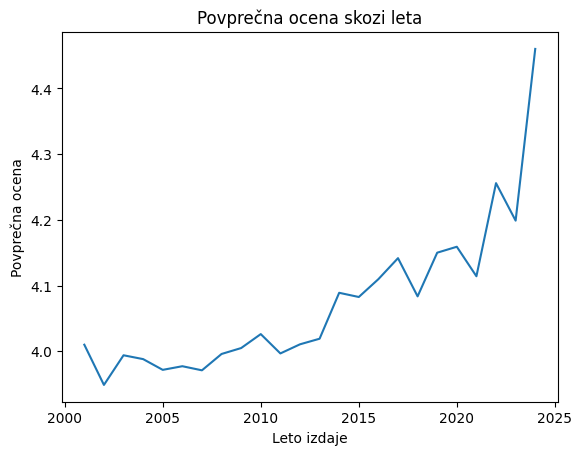

In [190]:
knjige.groupby("leto_izdaje")["povp_ocena"].mean().plot(title="Povprečna ocena skozi leta")
plt.xlabel("Leto izdaje")
plt.ylabel("Povprečna ocena")
plt.show()

Na tem mestu se lahko vprašamo, ali so knjige z več ocenami tudi bolje ocenjene. Odnos med tema spremenljivkama prikazuje spodnji diagram. Opazimo lahko, da imajo knjige z relativno malo ocenami precej razpršene povprečne ocene, z naraščanjem števila ocen pa se povprečna ocena rahlo stabilizira.
To vseeno ni pravilo in obstajajo precejšnja odstopanja od regresijske premice, vendar lahko kljub temu opazimo pozitivno korelacijo med spremenljivkama. Knjige z velikim številom ocen so namreč pogosto bolj kvalitetne in priljubljene, zato se povprečna ocena drastično ne spušča.

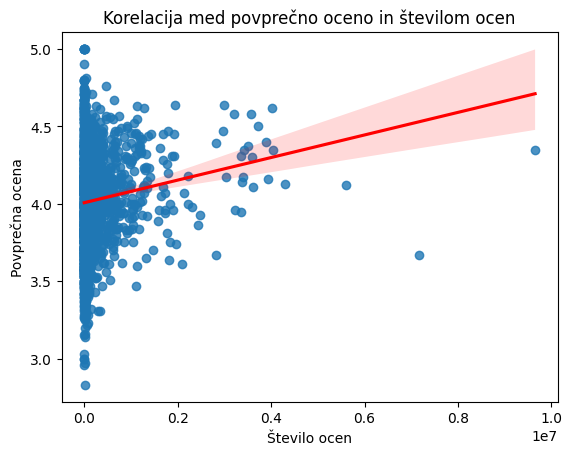

In [191]:
sns.regplot(
    x="st_ocen", 
    y="povp_ocena", 
    data=knjige,
    line_kws={"color":"red"} # s tem določimo nastavitve za regresijsko premico
)
plt.xlabel("Število ocen")
plt.ylabel("Povprečna ocena")
plt.title("Korelacija med povprečno oceno in številom ocen")
plt.show()


Pozitivno korelacijo lahko preverimo tudi s funkcijo `corr()`, ki izračuna korelacijsko matriko med stolpcema `st_ocen` in `povp_ocena`. Ta je vsebuje informacije o Pearsonovem korelacijskem koeficientu ustreznih spremenljivk, ki meri linearno povezavo med dvema spremenljivkama. Diagonalni elementi so vedno 1, elementi izven diagonale pa so v tem primeru pozitivna števila, ki so blizu 0, kar pomeni, da je pozitivna korelacija šibka.

In [192]:
knjige[["st_ocen", "povp_ocena"]].corr()

,st_ocen,povp_ocena
st_ocen,1.000000,0.121077
povp_ocena,0.121077,1.000000


Zanimivo je, da je korelacija med povprečno oceno in številom recenzij večja. Na spodnjem prikazu lahko opazimo, da se točke bolj prilegajo regresijski premici.  
Število recenzij je ponavadi boljši indikator "kakovosti" ali priljubljenosti knjige kot število ocen, ker odraža angažiranost bralcev. Recenzije namreč pišejo bolj motivirani bralci, ki knjigo tudi bolj temeljito ocenijo. Ocene pa so pogosto bolj površne, saj jih oddamo hitreje in bolj enostavno.

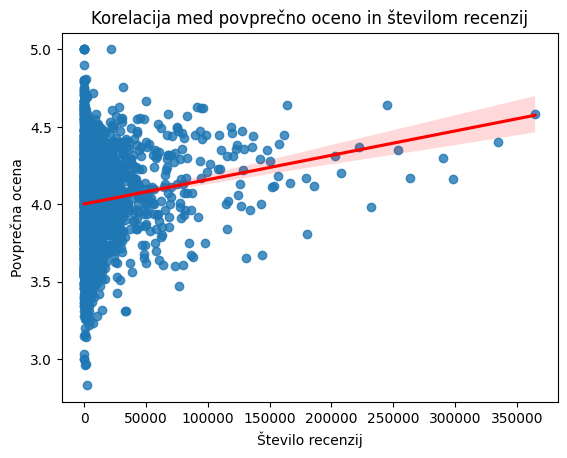

In [193]:
sns.regplot(
    x="st_recenzij", 
    y="povp_ocena", 
    data=knjige,
    line_kws={"color":"red"}
)
plt.xlabel("Število recenzij")
plt.ylabel("Povprečna ocena")
plt.title("Korelacija med povprečno oceno in številom recenzij")
plt.show()

To se odraža tudi v nekoliko višjem Pearsonovem korelacijskem koeficientu.

In [194]:
knjige[["st_recenzij", "povp_ocena"]].corr()

,st_recenzij,povp_ocena
st_recenzij,1.000000,0.146467
povp_ocena,0.146467,1.000000


Na sledečem stolpičnem diagramu lahko opazimo, da ima velika večina analiziranih knjig manj kot 500 strani. Izstopa nekaj knjig, ki naj bi imele več kot 1400 strani, vendar pri podrobnejšem ogledu ugotovimo, da gre večinoma za kolekcije vseh knjig iz serije, ki so na Goodreadsu predstavljene kot ena knjiga. Edina samostojna knjiga v tem naboru (prikazan v tabeli) je The Fiery Cross (Outlander, #5) avtorice Diane Gabaldon, ki ima 1443 strani, torej je to najdaljša knjiga na seznamu.

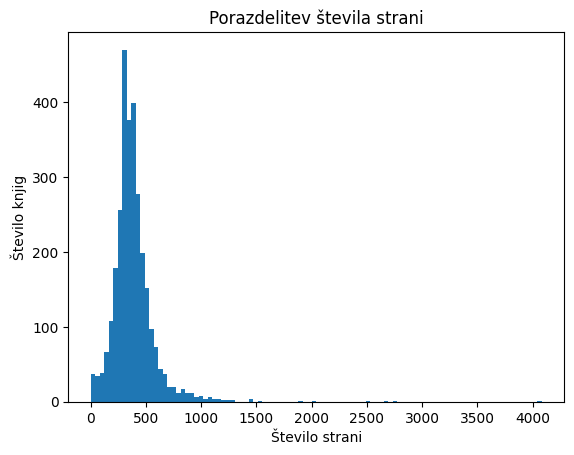

In [195]:
knjige["st_strani"].plot.hist(bins=100, title="Porazdelitev števila strani")
plt.xlabel("Število strani")
plt.ylabel("Število knjig")
plt.show()

In [196]:
najdaljse_knjige = knjige[knjige["st_strani"] > 1400]
najdaljse_knjige

,naslov,avtor,povp_ocena,st_ocen,st_recenzij,leto_izdaje,st_strani,jezik,st_trenutnih_bralcev,zanri
id_knjige,,,,,,,,,,
7822895,"The Millennium Trilogy (Millennium Trilogy, #1-3)",Stieg Larsson,4.47,57104,1949,2010,1531,English,2312,"Fiction, Thriller, Mystery, Crime, Suspense, M..."
10967,"The Fiery Cross (Outlander, #5)",Diana Gabaldon,4.26,223766,9322,2005,1443,English,17980,"Historical Fiction, Romance, Fantasy, Fiction,..."
24812,The Complete Calvin and Hobbes,Bill Watterson,4.81,41740,1253,2005,1456,English,1050,"Humor, Graphic Novels, Fiction, Comics, Classi..."
22847427,"Trust Trilogy (Trust Trilogy, #1-3; Trust seri...",Cristiane Serruya,4.09,130,30,2014,1900,English,120,NaN
81499,The Noble Life of The Prophet ﷺ,علي محمد الصلابي,4.41,992,133,2001,2024,English,411,"Islam, History, Religion, Biography, Nonfiction"
21481566,"The Inheritance Trilogy (Inheritance, #1-3.5)",N.K. Jemisin,4.28,9281,628,2014,1462,English,3989,"Fantasy, Fiction, Science Fiction, Adult, High..."
9814682,A Song of Ice and Fire (A Song of Ice and Fire...,George R.R. Martin,4.63,48052,1036,2011,4081,English,4972,"Fantasy, Fiction, Adventure, Epic Fantasy, Sci..."
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",J.K. Rowling,4.71,170744,350,2004,2690,English,344,"Fantasy, Harry Potter, Fiction, Young Adult, M..."
8726744,The Twilight Saga Complete Collection,Stephenie Meyer,4.34,75504,478,2010,2752,English,1972,"Fantasy, Romance, Young Adult, Vampires, Paran..."


Nekateri avtorji imajo na seznamu tudi več svojih knjig. Skupno jih je 507, graf pa prikazuje 10 avtorjev, ki so v tem smislu najuspešnejši. Med njimi je 5 moških in 5 žensk. Prvi je Stephen King, ki je napisal kar 21 knjig na seznamu, sledita pa mu Rick Riordan in James Patterson z 18 knjigami.

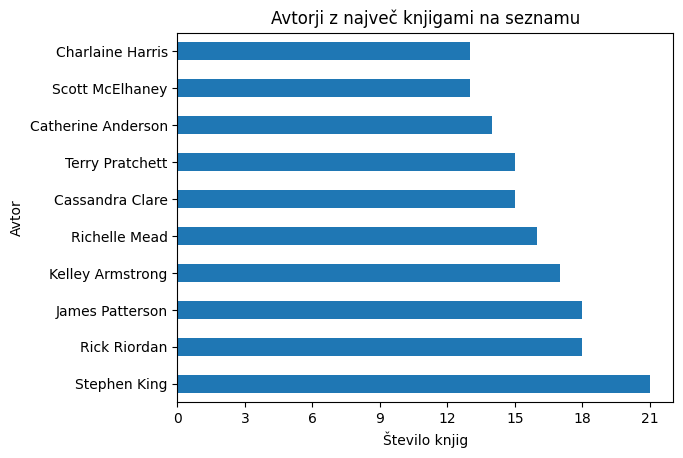

Število avtorjev z več kot eno knjigo: 507.


In [197]:
top_avtorji = knjige["avtor"].value_counts().nlargest(10)
top_avtorji.plot.barh()
plt.title("Avtorji z največ knjigami na seznamu")
plt.xlabel("Število knjig")
plt.ylabel("Avtor")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# gca = get current axes (trenutna os grafa)
# .xaxis dostopa do x-osi
# .set_major_locator določa, kako se izrisujejo glavne oznake na osi
# MaxNLocator(integer=True) nastavi oznake na cela števila
plt.show()

# Želimo še število avtorjev, ki imajo na seznamu več kot eno knjigo:
stevilo_knjig_avtor = knjige["avtor"].value_counts()
avtorji_vec_knjig = stevilo_knjig_avtor[stevilo_knjig_avtor > 1]
st_avtorjev = len(avtorji_vec_knjig)
print(f"Število avtorjev z več kot eno knjigo: {st_avtorjev}.")

Na naslednjem grafu lahko opazimo, da avtorji z največ knjigami niso nujno tudi najbolj aktualni. Med avtorji z največ trenutnimi bralci izstopa Sarah J. Maas, ki se na prejšnji seznam ni uvrstila, tu pa krepko vodi z 847265 trenutnimi bralci. Sledita Kristin Hannah s 385080 bralci in Suzanne Collins s 313779 bralci.
  
Edini avtor, ki se pojavi med najboljšimi desetimi v obeh primerih je Rick Riordan.

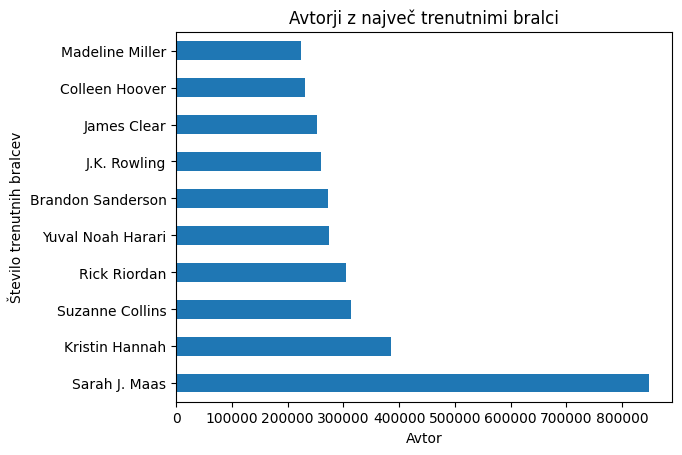

In [198]:
top_avtorji_bralci = knjige.groupby("avtor")["st_trenutnih_bralcev"].sum().nlargest(10)

top_avtorji_bralci.plot.barh()
plt.title("Avtorji z največ trenutnimi bralci")
plt.xlabel("Avtor")
plt.ylabel("Število trenutnih bralcev")
plt.show()

In [199]:
# izpišemo, koliko trenutnih bralcev imajo top 3 avtorice
avtorice = ["Sarah J. Maas", "Kristin Hannah", "Suzanne Collins"]
for avtor in avtorice:
    st_bralcev = int(knjige[knjige["avtor"] == avtor]["st_trenutnih_bralcev"].sum())
    print(f"{avtor} ima trenutno {st_bralcev} bralcev knjig na seznamu.")

Sarah J. Maas ima trenutno 847265 bralcev knjig na seznamu.
Kristin Hannah ima trenutno 385080 bralcev knjig na seznamu.
Suzanne Collins ima trenutno 313779 bralcev knjig na seznamu.


Vsaka knjiga ima podatek o tem, kateremu žanru oz. žanrom pripada. V spodnjem histogramu je prikazano, pod kateri žanr se uvršča največ knjig s seznama. Kar 2271 je knjig z žanrom "Fiction" (75,70 %), naslednja pa sta "Audiobook" s 1582  knjigami (52,73 %) in "Fantasy" s 1138 knjigami (37,93 %). Žanr "Audiobook" ni vsebinski žanr kot sta to "Fiction" in "Fantasy", ampak format knjige, ki je označen posebej, da lahko uporabniki filtrirajo in poiščejo avdio knjige.  

Četrti najpogostejši žanr je "Book Club" (939 knjig oz. 31,30 %), ki prav tako ni vsebinski, ampak označuje knjige, ki so primerne za knjižne klube. Take knjige so pogosto izbrane zaradi teme, ki spodbuja diskusijo in so zato primerne za skupinsko branje in pogovor.  

Če se torej osredotočimo na vsebinske žanre, so najpogostejši trije "Fiction", "Fantasy" in "Romance". V zadnjo kategorijo spada 900 knjig (30 %).

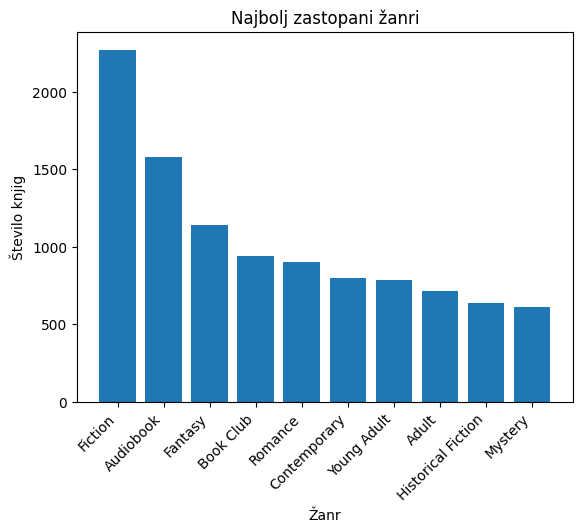

Fiction: 2271 knjig (75.70 % od 3000)
Audiobook: 1582 knjig (52.73 % od 3000)
Fantasy: 1138 knjig (37.93 % od 3000)
Book Club: 939 knjig (31.30 % od 3000)
Romance: 900 knjig (30.00 % od 3000)


In [200]:
vsi_zanri_seznami = knjige["zanri"].dropna().astype(str).str.split(", ")
# .dropna() odstrani vrstice brez vrednosti
# .str.split(", ") razbije niz žanrov v seznam posameznih žanrov

vsi_zanri = []
for seznam_zanrov_knjige in vsi_zanri_seznami: # gremo čez vsak seznam žanrov ene knjige
    for zanr in seznam_zanrov_knjige: # gremo čez vsak žanr znotraj te knjige
        vsi_zanri.append(zanr)
# dobimo en sam seznam vseh posameznih žanrov, ki jih lahko preštejemo s Counter

stevilo_zanrov = Counter(vsi_zanri) 

top10 = stevilo_zanrov.most_common(10) # vrne seznam tuple-ov

# ločeno shranimo žanre in števila
zanri = [par[0] for par in top10]
st_knjig = [par[1] for par in top10]

plt.bar(zanri, st_knjig)
plt.xticks(rotation=45, ha="right") # da se imena žanrov izpišejo brez prekrivanja
plt.title("Najbolj zastopani žanri")
plt.xlabel("Žanr")
plt.ylabel("Število knjig")
plt.show()

# preštejemo top 3 žanre
top5 = stevilo_zanrov.most_common(5)
celota = 3000

for zanr, st in top5:
    delez = st / celota * 100
    print(f"{zanr}: {st} knjig ({delez:.2f} % od {celota})")

Poglejmo si še, kako se je gibalo število izdanih knjig, ki pripadajo trem najbolj popularnim vsebinskim žanrom (Fiction, Fantasy, Romance). Vsaka pika v spodnjem grafu predstavlja število knjig določenega žanra v določenem letu. Barva pokaže, kateri žanr predstavlja pika.  

Število knjig vseh treh žanrov je hitro naraščalo po letu 2000 in doživelo višek med letoma 2005 in 2015. To se sklada s petimi najbolj produktivnimi leti, ki smo jih zbrali na začetku analize, saj vsa spadajo v to obdobje. Opazimo lahko, da se število knjig med žanri s časom obnaša približno enako, saj tri barve kažejo približno isti vzorec. Izstopajo predvsem fantazijske knjige, ki so med letoma 2005 in 2010 dosegle tudi 200 izdanih knjig na leto, nato pa doživele precejšen upad.

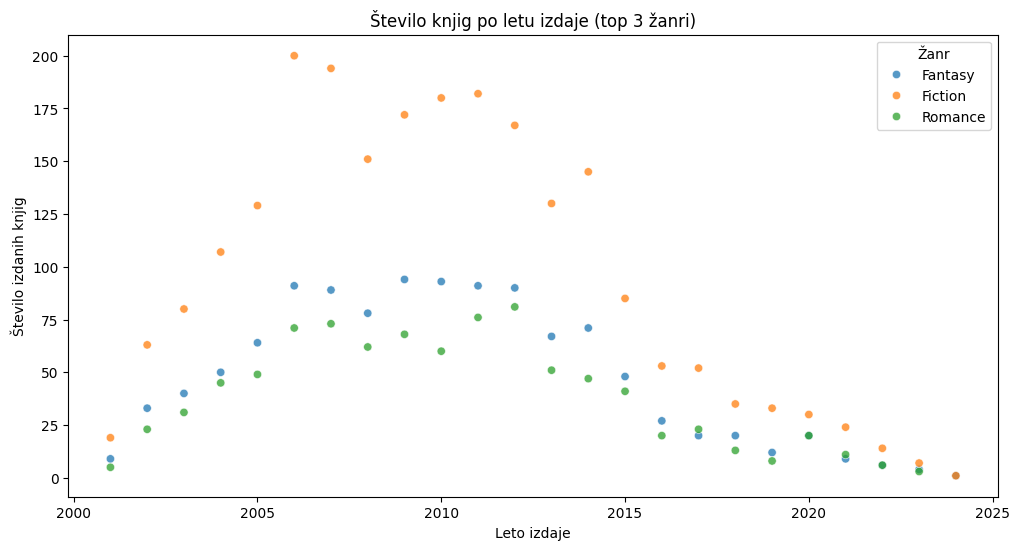

In [204]:
top3 = ["Fiction", "Fantasy", "Romance"]
vrstice = [] # to bo seznam slovarjev
for indeks, seznam_zanrov_knjige in zip(knjige.index, vsi_zanri_seznami):
    # knjige.index so številke vrstic v DataFrame knjige
    # vsi_zanri_seznam je seznam seznamov žanrov za vsako knjigo
    st_strani = knjige.loc[indeks, "st_strani"]
    leto = knjige.loc[indeks, "leto_izdaje"] 
    if pd.notna(st_strani) and st_strani <= 1443: 
        # pd.notna(st_strani) - preverimo, ali imamo podatek
        # ne upoštevamo nekaterih celotnih serij
        for zanr in seznam_zanrov_knjige:
            vrstice.append({"id_knjige": indeks, "zanr": zanr, "leto_izdaje": leto})

df_zanri = pd.DataFrame(vrstice) 
# seznam slovarjev spremenimo v tabelo (DataFrame)

zanri_med_top3 = df_zanri[df_zanri["zanr"].isin(top3)] 
# dobimo vrstice z žanri, ki so med top 3

df_top3_leto = zanri_med_top3.groupby(["leto_izdaje", "zanr"]).size().reset_index(name="st_knjig")
# združimo podatke po letu in žanru
# .reset_index(name="...") pretvori rezultat v DataFrame
# stolpec s številom knjig poimenujemo "st_knjig"

plt.figure(figsize=(12,6))
sns.scatterplot(
    x="leto_izdaje",
    y="st_knjig",
    hue="zanr", # da imajo žanri različne barve
    data=df_top3_leto,
    alpha=0.75 # prosojnost pik
)
plt.legend(title="Žanr") # naslov legende
plt.xlabel("Leto izdaje")
plt.ylabel("Število izdanih knjig")
plt.title("Število knjig po letu izdaje (top 3 žanri)")
plt.show()

## Zaključek
Z analizo pridobljenih podatkov smo prišli do nekaj glavnih spoznanj in ugotovili odnose med spremenljivkami ter lahko sklepali na vzroke za pridobljenimi rezultati.
Raziskava je bila delno omejena zaradi nekaterih manjkajočih podatkov in dejsta, da so bile analizirane samo nekatere knjige s seznama. Za nadaljnje raziskave bi bilo zanimivo vključiti tudi podatke o opisu knjig in preveriti katere besede se najpogosteje pojavljajo npr. v opisih knjig izbranih žanrov.